In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore") # ignore deprecation warnings in Python

In [2]:
data = pd.read_csv('/kaggle/input/int303-big-data-analysis-2223-S1/train.csv')
data_copy = data.copy()

# Data Analysis
1. Undertand the dataset data types.
2. Find out noisy data.
3. Data visualization

In [3]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1103 non-null   int64 
 1   Attrition                 1103 non-null   object
 2   BusinessTravel            1103 non-null   object
 3   DailyRate                 1103 non-null   int64 
 4   Department                1103 non-null   object
 5   DistanceFromHome          1103 non-null   int64 
 6   Education                 1103 non-null   int64 
 7   EducationField            1103 non-null   object
 8   EmployeeCount             1103 non-null   int64 
 9   EmployeeNumber            1103 non-null   int64 
 10  EnvironmentSatisfaction   1103 non-null   int64 
 11  Gender                    1103 non-null   object
 12  HourlyRate                1103 non-null   int64 
 13  JobInvolvement            1103 non-null   int64 
 14  JobLevel                

In [4]:
data.isnull().sum() # No empty value in the dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
numberical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'StandardHours']
categorical_features = ['BusinessTravel','Department', 'Education', 'EducationField',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance', 'Attrition', 'Over18', 'EmployeeCount','EmployeeNumber']
text_categorical_features = []

for i in categorical_features:
    if type(data_copy[i][0]) == str:
        text_categorical_features.append(i)

In [6]:
obj_columns = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']

data_copy['Over18'] = data_copy['Over18'].map({'Y':1})

# Map Target to the type that can be put into the classifier.
data_copy['Attrition'] = data_copy['Attrition'].replace({'No':0,'Yes':1})

# Do the same thing to variable, but use map function, which replace other value to NaN
data_copy['OverTime'] = data_copy['OverTime'].map({'No':0,'Yes':1})
data_copy['Gender'] = data_copy['Gender'].map({'Male':0,'Female':1})
data_copy['BusinessTravel'] = data_copy['BusinessTravel'].map({'Travel_Rarely': 1, 'Travel_Frequently': 2, 'Non-Travel': 0})

l1 = ['Attrition', 'OverTime', 'Gender', 'Over18', 'BusinessTravel']
l2 = [{'No':0,'Yes':1}, {'No':0,'Yes':1}, {'Male':0,'Female':1},{'Y':1}, 
      {'Travel_Rarely': 1, 'Travel_Frequently': 2, 'Non-Travel': 0}];

# Encode object columns
for col in obj_columns:
    mapping = {value:counter for counter, value in enumerate(data_copy[col].value_counts().index)}
    print('For{}, the mapping is:\n{}'.format(col, mapping))
    data_copy[col] = data_copy[col].map(mapping)
    l1.append(col); l2.append(mapping)

ForDepartment, the mapping is:
{'Research & Development': 0, 'Sales': 1, 'Human Resources': 2}
ForEducationField, the mapping is:
{'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Other': 4, 'Human Resources': 5}
ForJobRole, the mapping is:
{'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}
ForMaritalStatus, the mapping is:
{'Married': 0, 'Single': 1, 'Divorced': 2}


In [7]:
l3 = []
for dict_ori in l2:
    dict_new = {value:key for key,value in dict_ori.items()}
    l3.append(dict_new)

tf1 = {}
for i in range(9):
    tf1[str(l1[i])] = {}
    tf1[str(l1[i])] = l3[i]

In [8]:
del l1, l2, l3
tf1

{'Attrition': {0: 'No', 1: 'Yes'},
 'OverTime': {0: 'No', 1: 'Yes'},
 'Gender': {0: 'Male', 1: 'Female'},
 'Over18': {1: 'Y'},
 'BusinessTravel': {1: 'Travel_Rarely',
  2: 'Travel_Frequently',
  0: 'Non-Travel'},
 'Department': {0: 'Research & Development', 1: 'Sales', 2: 'Human Resources'},
 'EducationField': {0: 'Life Sciences',
  1: 'Medical',
  2: 'Marketing',
  3: 'Technical Degree',
  4: 'Other',
  5: 'Human Resources'},
 'JobRole': {0: 'Sales Executive',
  1: 'Research Scientist',
  2: 'Laboratory Technician',
  3: 'Manufacturing Director',
  4: 'Healthcare Representative',
  5: 'Manager',
  6: 'Sales Representative',
  7: 'Research Director',
  8: 'Human Resources'},
 'MaritalStatus': {0: 'Married', 1: 'Single', 2: 'Divorced'}}

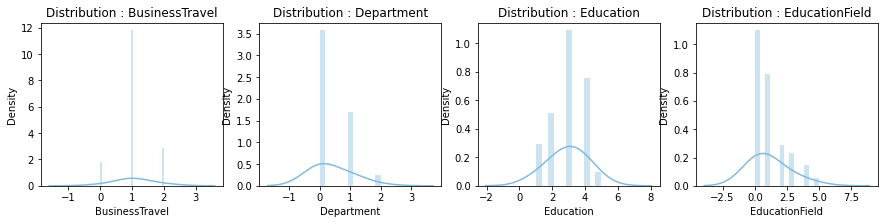

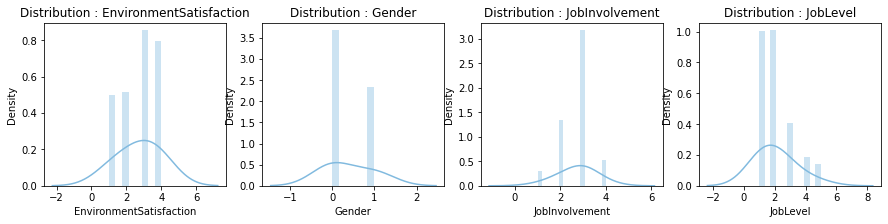

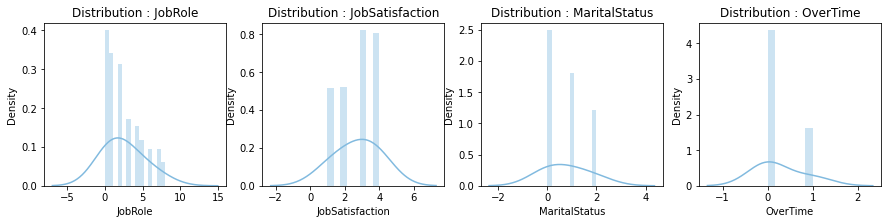

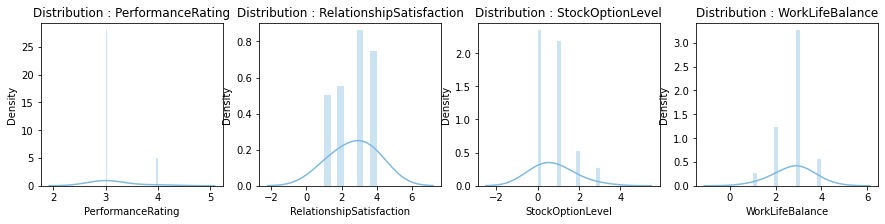

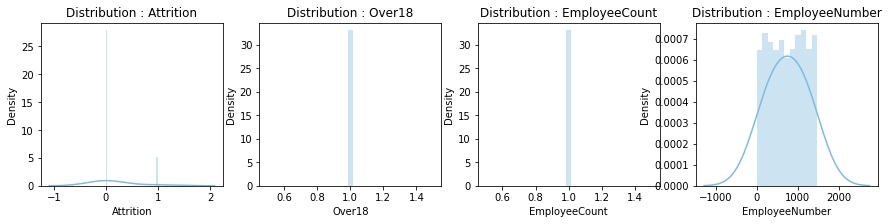

In [9]:
colors = ['#81BADF','#FCF6F5']

for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 4,figsize = (15,3))
    a = 1
    for j in categorical_features[(i*4) : (i*4) + 4]:
        plt.subplot(1,4,a) 
        sns.distplot(data_copy[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Distribution : ' + j)
        a += 1

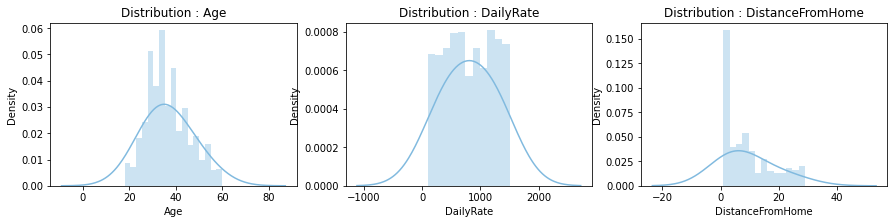

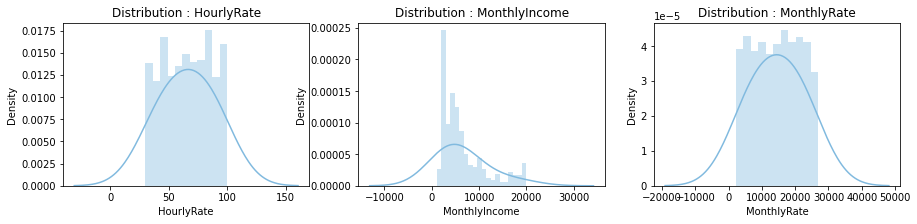

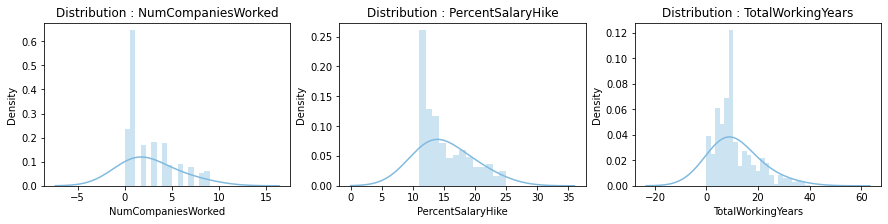

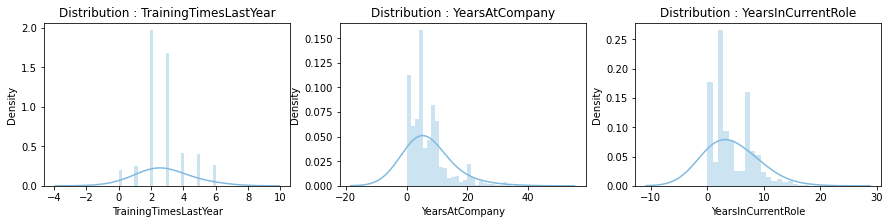

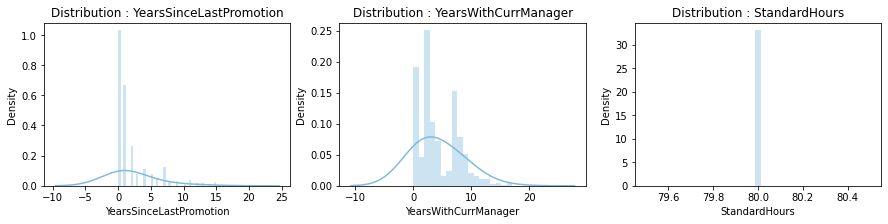

In [10]:
for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
    a = 1
    for j in numberical_features[(i*3) : (i*3) + 3]:
        plt.subplot(1,3,a) 
        sns.distplot(data_copy[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Distribution : ' + j)
        a += 1

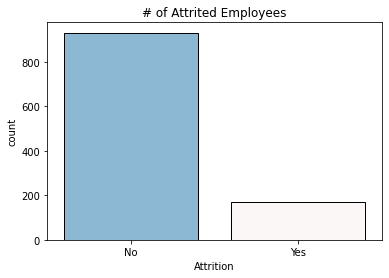

In [11]:
ax = sns.countplot('Attrition',data = data_copy, palette = colors, edgecolor = 'black')
ax.set_xticklabels(tf1['Attrition'][j] for j in sorted(data_copy['Attrition'].unique()))
plt.title('# of Attrited Employees');
plt.show()

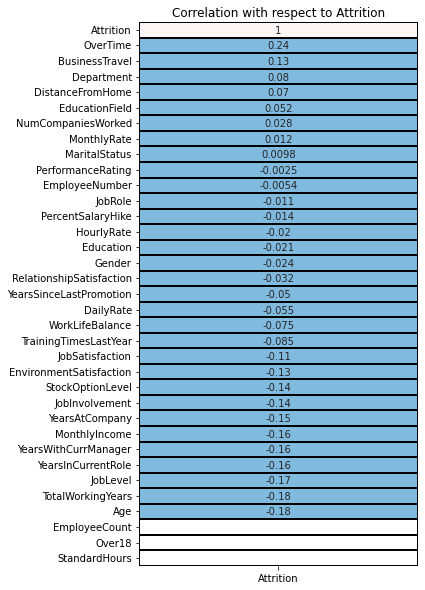

In [12]:
# Correlation Matrix:
corr = data_copy.corrwith(data_copy['Attrition']).sort_values(ascending = False).to_frame()
corr.columns = ['Attrition']
plt.subplots(figsize = (5,10))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.3,linecolor = 'black', cbar = False);
plt.title('Correlation with respect to Attrition');

# Summary of Data Analysis
1. The dataset needs to be more balanced. SMOTE might need to be involved.
2. Most data have analysis value, but 'Over18', 'EmployeeCount,' 'EmployeeNumber,' and 'StandardHours' do not.
3. Some data needs to be better normalized and handled.

#  Data Preprocessing
1. Feature Selection (Data Cleaning) Remove 'Over18','EmployeeCount','EmployeeNumber','StandardHours' attributes. Encode categorical variables.
2. Normalize the training data (Data Transformation) By MinMaxScaler.
3. Balance the training data By SMOTE

In [13]:
# Drop the columns are unrelevant for Attrution prediction
data_copy.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'], axis=1, inplace=True)

In [14]:
x = data_copy.drop('Attrition',axis=1).values
y = data_copy['Attrition'].values

# Split Training Data
Just for self-evaluate

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def fit_and_evaluate_model(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train,y_train)
    prediction = clf.predict(x_test)
    # Confusion Matrix
    cm = confusion_matrix(y_test,prediction)
    names = ['TN','FP','FN','TP']
    counts = [v for v in cm.flatten()]
    percentages = ['{0:.2%}'.format(v) for v in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='', cbar = False)
    
    # Classification Report
    print(classification_report(y_test,prediction))
    print(clf.__class__.__name__, ":",accuracy_score(y_test,prediction))

In [17]:
# Scaling Data and Balance
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

min_max = MinMaxScaler()
x_scaled_train = min_max.fit(X_train).transform(X_train)

oversampled = SMOTE(random_state=0, sampling_strategy = 0.5)
X_smote_train, y_smote_train = oversampled.fit_resample(x_scaled_train, y_train)
print("smote shape: ",X_smote_train.shape)

smote shape:  (1177, 30)


In [18]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

xgb_clf_test = XGBClassifier(n_estimators=1000, min_child_weight=8, max_depth=24,
                   learning_rate=0.006)
lgbm_clf_test = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

*******XGB Benchmark******
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       146
           1       0.71      0.25      0.37        20

    accuracy                           0.90       166
   macro avg       0.81      0.62      0.66       166
weighted avg       0.88      0.90      0.88       166

XGBClassifier : 0.8975903614457831


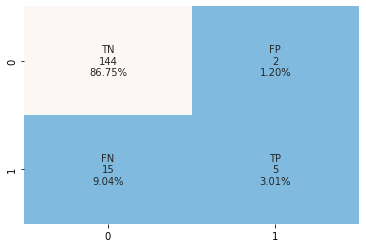

In [19]:
print("*******XGB Benchmark******")
fit_and_evaluate_model(xgb_clf_test,X_train, y_train, X_test,y_test)

*******LGBM Benchmark******
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       146
           1       0.78      0.35      0.48        20

    accuracy                           0.91       166
   macro avg       0.85      0.67      0.72       166
weighted avg       0.90      0.91      0.89       166

LGBMClassifier : 0.9096385542168675


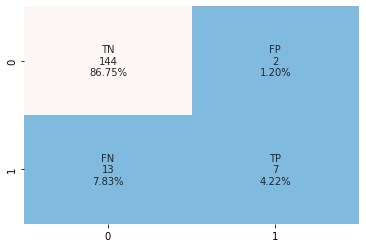

In [20]:
print("*******LGBM Benchmark******")
fit_and_evaluate_model(lgbm_clf_test,X_train, y_train, X_test,y_test)

*******XGB With Scaler******
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       146
           1       0.00      0.00      0.00        20

    accuracy                           0.88       166
   macro avg       0.44      0.50      0.47       166
weighted avg       0.77      0.88      0.82       166

XGBClassifier : 0.8795180722891566


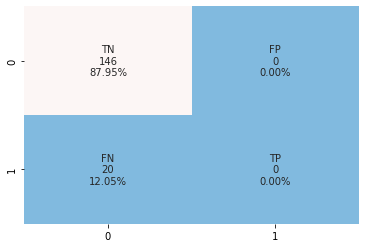

In [21]:
xgb_clf_test = XGBClassifier(n_estimators=1000, min_child_weight=8, max_depth=24,
                   learning_rate=0.006)

print("*******XGB With Scaler******")
fit_and_evaluate_model(xgb_clf_test,x_scaled_train, y_train, X_test,y_test)

*******LGBM With Scaler******
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       146
           1       0.00      0.00      0.00        20

    accuracy                           0.88       166
   macro avg       0.44      0.50      0.47       166
weighted avg       0.77      0.88      0.82       166

LGBMClassifier : 0.8795180722891566


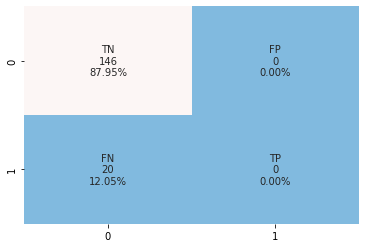

In [22]:
lgbm_clf_test = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

print("*******LGBM With Scaler******")
fit_and_evaluate_model(lgbm_clf_test,x_scaled_train, y_train, X_test,y_test)

*******XGB With SMOTE Scaler******
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       146
           1       0.00      0.00      0.00        20

    accuracy                           0.88       166
   macro avg       0.44      0.50      0.47       166
weighted avg       0.77      0.88      0.82       166

XGBClassifier : 0.8795180722891566


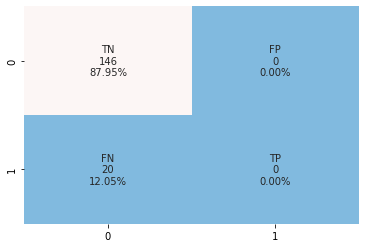

In [23]:
xgb_clf_test = XGBClassifier(n_estimators=1000, min_child_weight=8, max_depth=24,
                   learning_rate=0.006)

print("*******XGB With SMOTE Scaler******")
fit_and_evaluate_model(xgb_clf_test,X_smote_train, y_smote_train, X_test,y_test)

*******LGBM With SMOTE Scaler******
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       146
           1       0.00      0.00      0.00        20

    accuracy                           0.88       166
   macro avg       0.44      0.50      0.47       166
weighted avg       0.77      0.88      0.82       166

LGBMClassifier : 0.8795180722891566


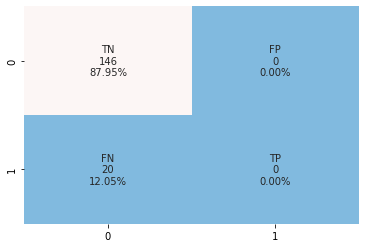

In [24]:
lgbm_clf_test = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

print("*******LGBM With SMOTE Scaler******")
fit_and_evaluate_model(lgbm_clf_test,X_smote_train, y_smote_train, X_test,y_test)

In [25]:
del lgbm_clf_test, xgb_clf_test, X_train, X_test, y_train, y_test, X_smote_train, y_smote_train,x_scaled_train

In [26]:
# Scaling Data and Balance
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

min_max = MinMaxScaler()
x_scaled = min_max.fit(x).transform(x)

oversampled = SMOTE(random_state=0, sampling_strategy = 0.5)
X_smote, y_smote = oversampled.fit_resample(x_scaled, y)
print("smote shape: ",X_smote.shape)

smote shape:  (1396, 30)


In [27]:
lgbm_clf = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
lgbm_clf.fit(X_smote, y_smote)

LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000)

In [28]:
test_data = pd.read_csv('/kaggle/input/int303-big-data-analysis-2223-S1/test.csv')
test_data_copy = test_data.copy()

# Drop the columns are unrelevant for Attrition prediction
test_data_copy.drop(['Attrition', 'Over18','EmployeeCount','EmployeeNumber','StandardHours'], axis=1, inplace=True)

# Do the same thing to variable, but use map function, which replace other value to NaN
test_data_copy['OverTime'] = test_data_copy['OverTime'].map({'No':0,'Yes':1})
test_data_copy['Gender'] = test_data_copy['Gender'].map({'Male':0,'Female':1})
test_data_copy['BusinessTravel'] = test_data_copy['BusinessTravel'].map({'Travel_Rarely': 1, 'Travel_Frequently': 2, 'Non-Travel': 0})

#Encode object columns
for col in obj_columns:
    mapping = {value:counter for counter, value in enumerate(test_data_copy[col].value_counts().index)}
    print('For{}, the mapping is \n{}'.format(col, mapping))
    test_data_copy[col] = test_data_copy[col].map(mapping)

ForDepartment, the mapping is 
{'Research & Development': 0, 'Sales': 1, 'Human Resources': 2}
ForEducationField, the mapping is 
{'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Other': 4, 'Human Resources': 5}
ForJobRole, the mapping is 
{'Research Scientist': 0, 'Sales Executive': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}
ForMaritalStatus, the mapping is 
{'Married': 0, 'Single': 1, 'Divorced': 2}


In [29]:
test_x = test_data_copy

In [30]:
# Scaling Data (Data Normalization)
from sklearn.preprocessing import MinMaxScaler

min_max_test = MinMaxScaler()
test_x_scaled = min_max_test.fit_transform(test_x)

In [31]:
test_pred = lgbm_clf.predict(test_x_scaled)

submission = pd.DataFrame(test_data['EmployeeNumber'], columns = ['EmployeeNumber'])
submission['Attrition'] = test_pred 
submission['Attrition'] = submission['Attrition'].replace({0:'No',1:'Yes'})
submission.head()

,EmployeeNumber,Attrition
0,1,No
1,3,Yes
2,12,No
3,14,No
4,18,No


In [32]:
submission.to_csv("submission.csv", index = False, header = True)
submission['Attrition'].value_counts()

No     336
Yes     31
Name: Attrition, dtype: int64